In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Project Description

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades


 problem statement
 
 Predict CGPA of a student based on different grades in four years.

In [201]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv")
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [202]:
print("Size of the dataset:", df.shape)
print("Name of the columns:", df.columns)

Size of the dataset: (571, 43)
Name of the columns: Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')


Columns Description:
    
    Seat No : The enrolled number of candidate that took the exams
    CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks provided    to student.
    All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX  are numbers where first X represents the year the canditate took exam


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [204]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [205]:
df.isnull().sum().sum()

425

In [206]:
df_nul =df.isnull()

In [207]:
for column in df_nul.columns.values.tolist():
    print(df_nul[column].value_counts())
    print("")
    

False    571
Name: Seat No., dtype: int64

False    571
Name: PH-121, dtype: int64

False    571
Name: HS-101, dtype: int64

False    570
True       1
Name: CY-105, dtype: int64

False    570
True       1
Name: HS-105/12, dtype: int64

False    569
True       2
Name: MT-111, dtype: int64

False    571
Name: CS-105, dtype: int64

False    569
True       2
Name: CS-106, dtype: int64

False    569
True       2
Name: EL-102, dtype: int64

False    569
True       2
Name: EE-119, dtype: int64

False    569
True       2
Name: ME-107, dtype: int64

False    569
True       2
Name: CS-107, dtype: int64

False    566
True       5
Name: HS-205/20, dtype: int64

False    566
True       5
Name: MT-222, dtype: int64

False    564
True       7
Name: EE-222, dtype: int64

False    564
True       7
Name: MT-224, dtype: int64

False    564
True       7
Name: CS-210, dtype: int64

False    566
True       5
Name: CS-211, dtype: int64

False    566
True       5
Name: CS-203, dtype: int64

False    565
True 

In [208]:
columns_to_check = df.columns[4:43]  # Select columns 4 to 42

In [209]:
df[df[columns_to_check].isnull().any(axis=1)]

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
44,CS-97045,D,C,NaN,NaN,NaN,C-,NaN,NaN,D+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.493
60,CS-97061,C,B+,WU,D+,C-,B-,F,D,A-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.418
86,CS-97087,D,D,D+,B-,F,D,D,D,D+,...,D+,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.261
91,CS-97092,WU,C-,D,D,WU,D,D,D,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380
137,CS-97138,C-,C+,WU,WU,WU,B,WU,WU,A-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,CS-97424,D,D+,D,D,C-,C,C+,B-,C,...,D,D,D+,D,D,W,C,B,NaN,1.747
424,CS-97425,C-,D+,B-,C+,D+,C-,A-,C-,D+,...,W,C,B-,F,D+,W,D,B,NaN,1.835
481,CS-97482,B-,A-,C+,D,B,B,A-,A-,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.896
543,CS-97544,A,B,A,A-,A-,A,B+,B+,B+,...,WU,NaN,NaN,W,WU,NaN,NaN,NaN,W,3.607


In [210]:
# for getting maximum number of nan values rows
nan_counts = df.isnull().sum(axis=1)
df[nan_counts == nan_counts.max()]

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
44,CS-97045,D,C,NaN,NaN,NaN,C-,NaN,NaN,D+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.493


In [211]:
row_with_max_nan = nan_counts.idxmax()

In [212]:
row_with_max_nan

44

In [213]:
# Drop the row with the maximum number of NaN values
df.drop(row_with_max_nan, inplace = True)

In [214]:
# shape after removing the row
df.shape

(570, 43)

In [215]:
columns_with_nan = df.columns[df.isnull().any()].tolist()

In [216]:
# Impute mode in columns with NaN values
for column in columns_with_nan:
    mode_value = df[column].mode().iloc[0]
    df[column].fillna(mode_value, inplace=True)
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [217]:
#we rename them to ease access later and for the sake of convention of course codes
df.rename(columns={'HS-105/12': 'HS-105', 'HS-205/20': 'HS-205'},inplace=True)

In [218]:
df.drop("Seat No.",axis=1,inplace=True)

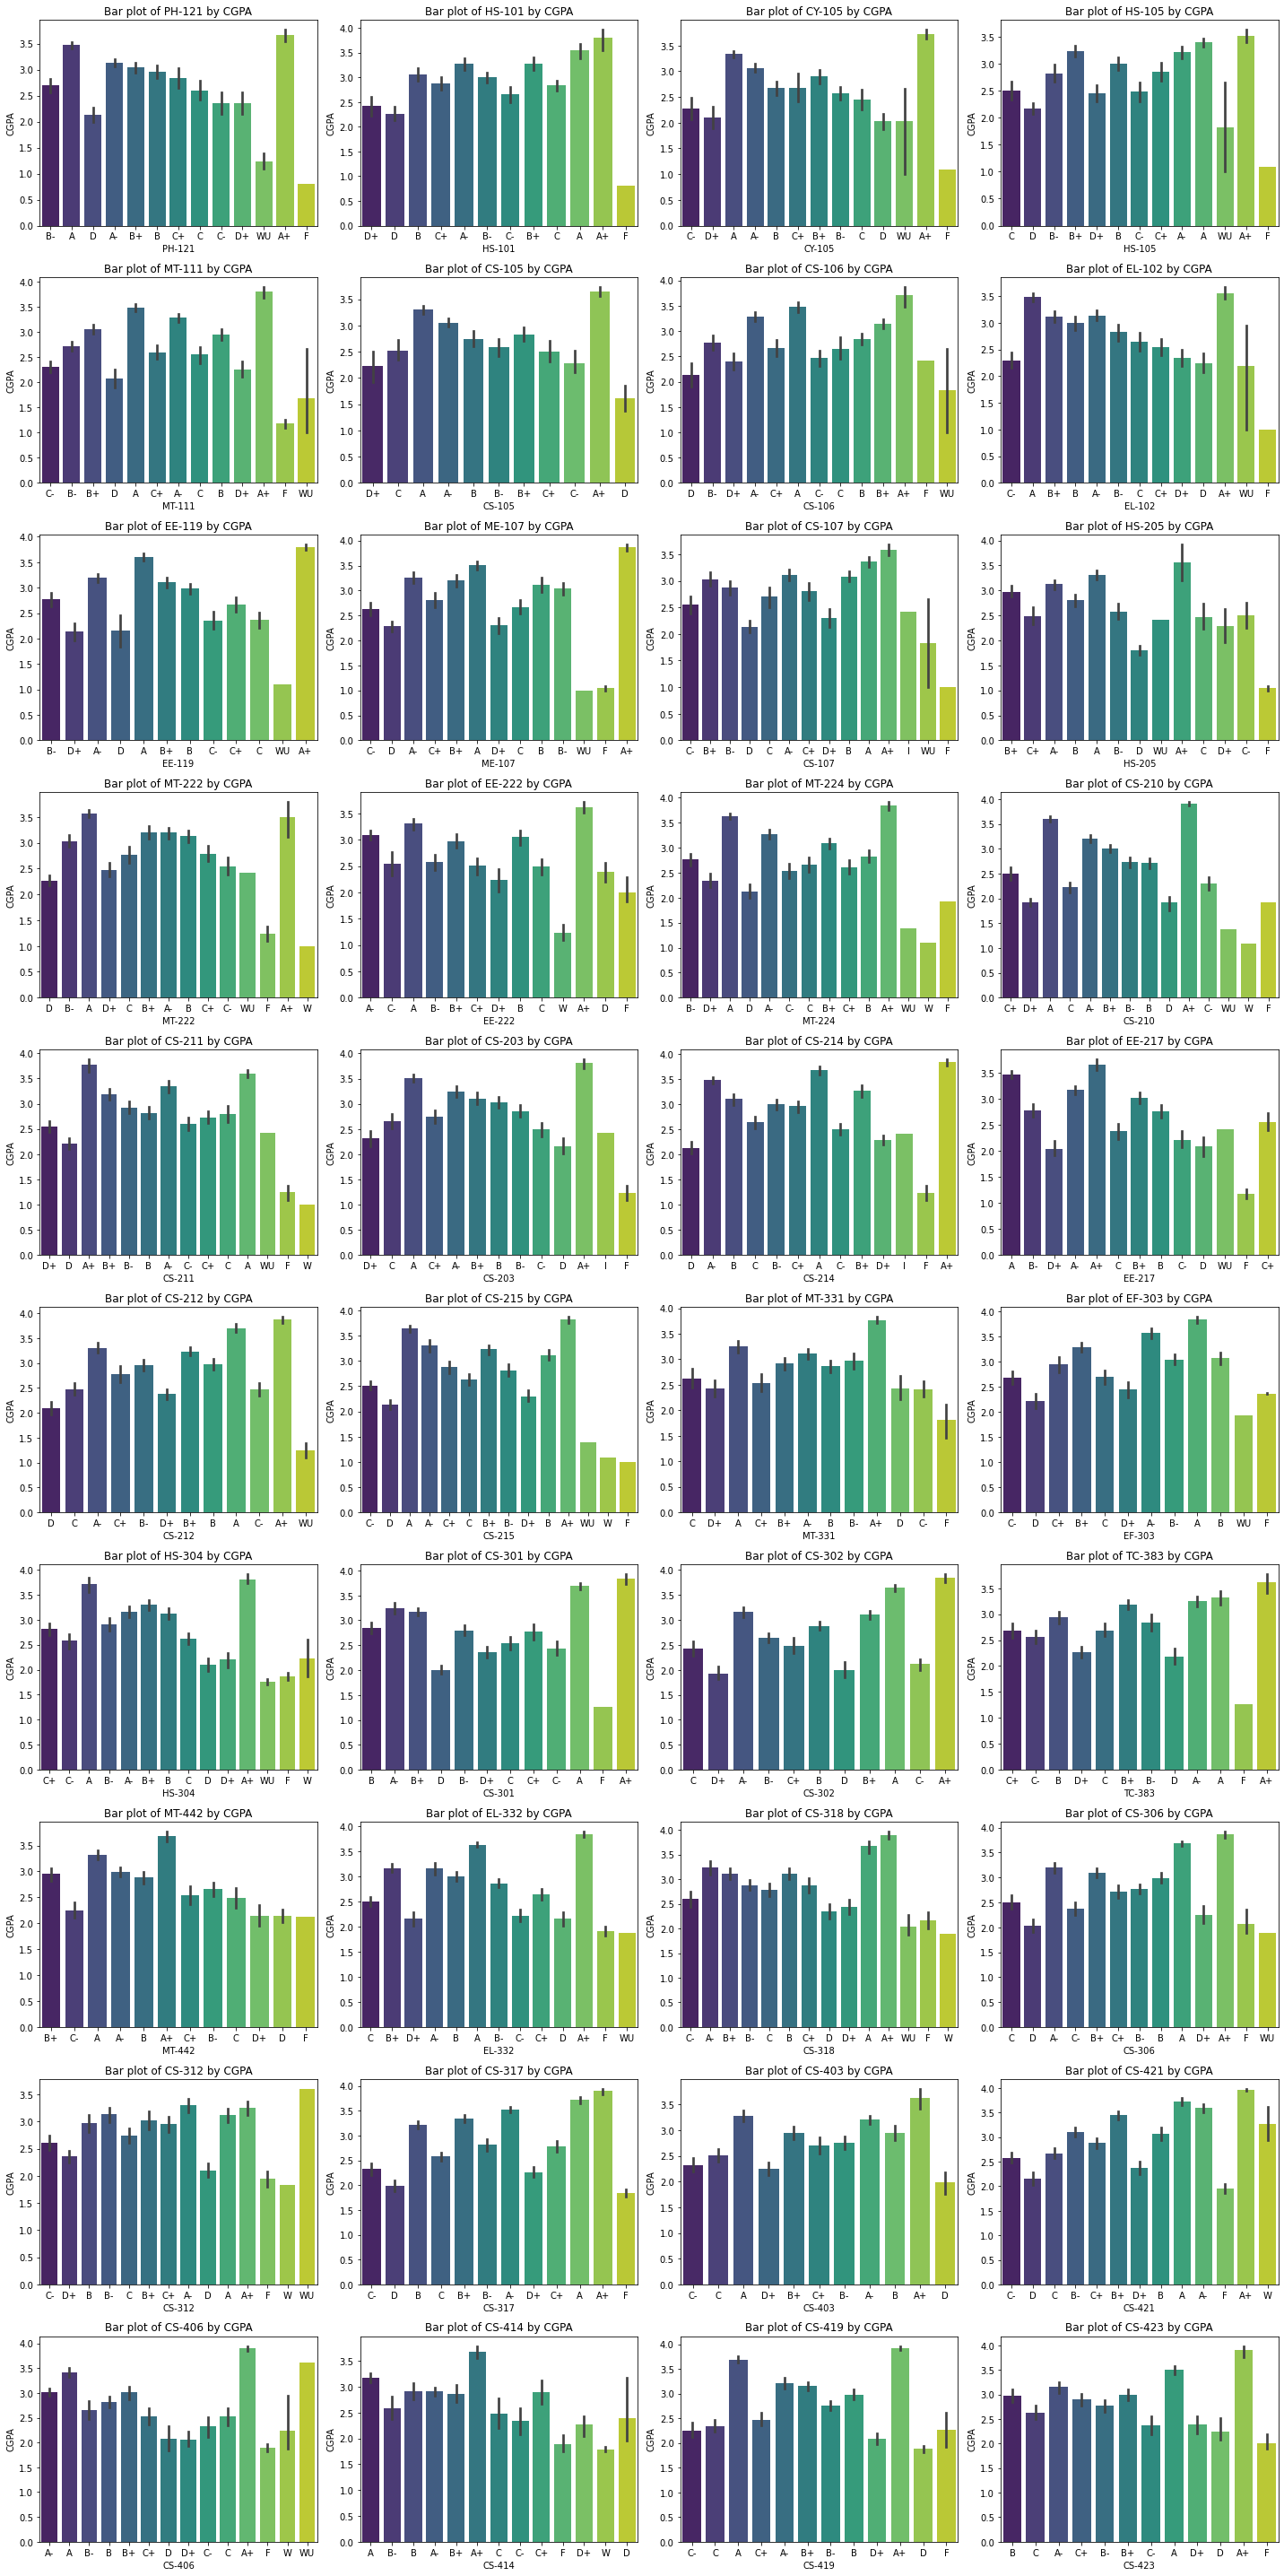

In [219]:
# Loop through each column (excluding the target column)
plt.figure(figsize=(20, 40))
plot_number = 1

for column in df.columns:
    if column != 'CGPA' and plot_number <= 40:
        ax = plt.subplot(10, 4, plot_number)
        sns.barplot(data=df, x=column, y='CGPA', palette='viridis')
        plt.title(f'Bar plot of {column} by CGPA')
        plot_number += 1

plt.tight_layout()
plt.show()

A+ is highest level in all subject in all year

In [220]:
for i in df.columns:
    print(df[i].value_counts())
    print("")

A-    112
A     111
B+     61
B      57
B-     56
D      43
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64

A-    82
B-    78
C     67
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64

A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64

A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105, dtype: int64

A-    106
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64

A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+     23
C      22
C-     21
D+     15
D      12
Name: CS-105, dtype: int64

A-    117
B+    101
B      96
A      56
B-     54
C+     41
D+     29
C-     27
D      24
C      18
A+     

In [221]:
grade_mapping = {'A+': 4.0, 'A': 4.0, 'A-': 3.7, 'B+': 3.4, 'B': 3.0,
                 'B-': 2.7, 'C+': 2.4, 'C': 2.0, 'C-': 1.7, 'D+': 1.4,
                 'D': 1.0, 'F': 0.0, 'WU': 0.0, 'W': 0.0, 'I': 0.0}
# Replace grades with numerical values
df.replace(grade_mapping, inplace=True)

In [222]:
df.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,...,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,...,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448


In [223]:
df.dtypes

PH-121    float64
HS-101    float64
CY-105    float64
HS-105    float64
MT-111    float64
CS-105    float64
CS-106    float64
EL-102    float64
EE-119    float64
ME-107    float64
CS-107    float64
HS-205    float64
MT-222    float64
EE-222    float64
MT-224    float64
CS-210    float64
CS-211    float64
CS-203    float64
CS-214    float64
EE-217    float64
CS-212    float64
CS-215    float64
MT-331    float64
EF-303    float64
HS-304    float64
CS-301    float64
CS-302    float64
TC-383    float64
MT-442    float64
EL-332    float64
CS-318    float64
CS-306    float64
CS-312    float64
CS-317    float64
CS-403    float64
CS-421    float64
CS-406    float64
CS-414    float64
CS-419    float64
CS-423    float64
CS-412    float64
CGPA      float64
dtype: object

In [224]:
# final size f the data
df.shape

(570, 42)

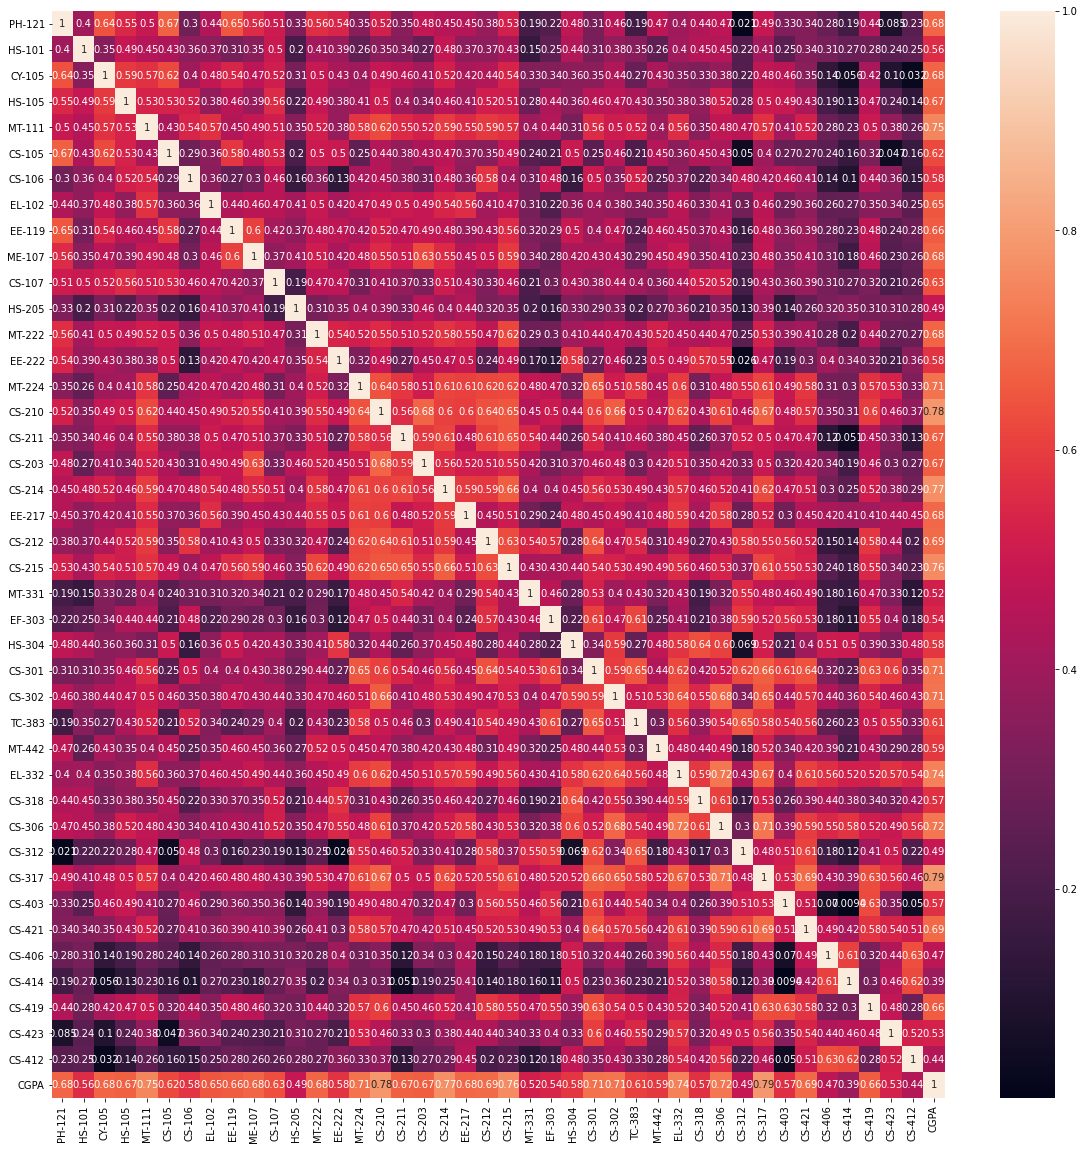

In [225]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [226]:
df.corr().CGPA.sort_values()

CS-414    0.394732
CS-412    0.443190
CS-406    0.471553
CS-312    0.488822
HS-205    0.489118
MT-331    0.521946
CS-423    0.529234
EF-303    0.542040
HS-101    0.562554
CS-403    0.568277
CS-318    0.570583
EE-222    0.577318
CS-106    0.578472
HS-304    0.584704
MT-442    0.587736
TC-383    0.607108
CS-105    0.624637
CS-107    0.634734
EL-102    0.649135
CS-419    0.660973
EE-119    0.662029
CS-203    0.665738
HS-105    0.667637
CS-211    0.668195
PH-121    0.675320
ME-107    0.677971
MT-222    0.678236
CY-105    0.678795
EE-217    0.682798
CS-421    0.688340
CS-212    0.693019
CS-301    0.705824
MT-224    0.708761
CS-302    0.711680
CS-306    0.718473
EL-332    0.740723
MT-111    0.750342
CS-215    0.761571
CS-214    0.770073
CS-210    0.784366
CS-317    0.789689
CGPA      1.000000
Name: CGPA, dtype: float64

In [228]:
# split the columns as x and y
x = df.drop(['CS-403','CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],axis = 1) 
y = df[['CGPA']]

In [269]:
# Make lists based on the first year, second year, and third year
first_year = []
second_year = []
third_year = []

for item in [x]:
    for i in item:
        if i[3] == '1':
            first_year.append(i)
        elif i[3] == '2':
            second_year.append(i)
        else:
            third_year.append(i)
 
           
model2_columns = first_year + second_year
model3_columns = model2_columns + third_year

# Model- 1 LinearRegression

# Predict final CGPA based on GPs of first year only.

In [241]:
features = df[list(first_year)].values
target = df["CGPA"].values

In [249]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [258]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.30)

In [261]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
# model evaluation for training set
print("The model performance for training set")
print('RMSE is:',mean_squared_error(y_train, y_train_pred))
print('MAE is:', mean_absolute_error(y_train, y_train_pred))
print("---------------------------------------")
# model evaluation for testing set 
print("The model performance for testing set")
print('RMSE is:',mean_squared_error(y_test, y_test_pred))# Return the loss it is non-negative . The best value is 0.0
print('MAE is:',mean_absolute_error(y_test, y_test_pred))# Return the loss it is non-negative . The best value is 0.0
print("---------------------------------------")
test_score= lr.score(x_test, y_test)# Return R2 score . The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse) 
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

The model performance for training set
RMSE is: 0.060963104092216815
MAE is: 0.18594743314481982
---------------------------------------
The model performance for testing set
RMSE is: 0.06265676975396767
MAE is: 0.19248758269873
---------------------------------------
The score of model for testing set
Test score 0.82


In [262]:
input_list=[]
input_list.append([4, 3.0, 0, 0, 0, 1.0, 4, 2.0, 0, 4, 4])
print(input_list )
print(lr.predict(input_list))

[[4, 3.0, 0, 0, 0, 1.0, 4, 2.0, 0, 4, 4]]
[2.16014714]


In [263]:
test = pd.DataFrame({"Actual": y_test,"Predicted": y_test_pred})
test

,Actual,Predicted
0,2.784,2.701711
1,2.246,2.424204
2,3.574,3.539499
3,1.905,2.017169
4,2.171,1.973303
...,...,...
166,1.863,2.452647
167,2.579,2.656598
168,3.240,3.082193
169,3.026,2.848749


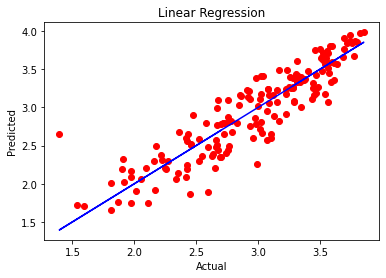

In [264]:
plt.scatter(x = y_test_pred, y = y_test , color= 'r')
plt.plot(y_test_pred,y_test_pred,color = 'b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")
plt.show()

# Predict final CGPA based on GPs of two years.

In [265]:
features = df[list(model2_columns)].values
target = df["CGPA"].values

In [266]:
# split the data
x_train, x_test, y_train, y_test = train_test_s plit(features, target, test_size=0.30)

In [267]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
# model evaluation for training set
print("The model performance for training set")
print('RMSE is:',mean_squared_error(y_train, y_train_pred))
print('MAE is:', mean_absolute_error(y_train, y_train_pred))
print("---------------------------------------")
# model evaluation for testing set 
print("The model performance for testing set")
print('RMSE is:',mean_squared_error(y_test, y_test_pred))# Return the loss it is non-negative . The best value is 0.0
print('MAE is:',mean_absolute_error(y_test, y_test_pred))# Return the loss it is non-negative . The best value is 0.0
print("---------------------------------------")
test_score= lr.score(x_test, y_test)# Return R2 score . The best possible score is 1.0  
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

The model performance for training set
RMSE is: 0.01929724370377852
MAE is: 0.10169567039049823
---------------------------------------
The model performance for testing set
RMSE is: 0.0664769668283338
MAE is: 0.13643940434835017
---------------------------------------
The score of model for testing set
Test score 0.83


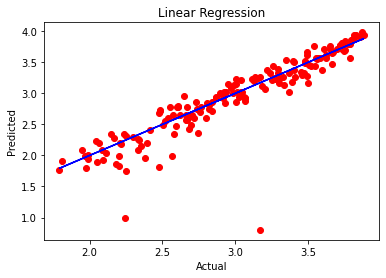

In [268]:
plt.scatter(x = y_test_pred, y = y_test , color= 'r')
plt.plot(y_test_pred,y_test_pred,color = 'b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")
plt.show()

# Predict final CGPA based on GPs of three years.

In [270]:
features = df[list(model3_columns)].values
target = df["CGPA"].values

In [271]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.30)

In [272]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
# model evaluation for training set
print("The model performance for training set")
print('RMSE is:',mean_squared_error(y_train, y_train_pred))
print('MAE is:', mean_absolute_error(y_train, y_train_pred))
print("---------------------------------------")
# model evaluation for testing set 
print("The model performance for testing set")
print('RMSE is:',mean_squared_error(y_test, y_test_pred))# Return the loss it is non-negative . The best value is 0.0
print('MAE is:',mean_absolute_error(y_test, y_test_pred))# Return the loss it is non-negative . The best value is 0.0
print("---------------------------------------")
test_score= lr.score(x_test, y_test)# Return R2 score . The best possible score is 1.0  
print("The score of model for testing set")
print('Test score {}'.format(test_score.round(2)))

The model performance for training set
RMSE is: 0.019179275601104225
MAE is: 0.07417719092629801
---------------------------------------
The model performance for testing set
RMSE is: 0.02242059235306646
MAE is: 0.0927508811082886
---------------------------------------
The score of model for testing set
Test score 0.94


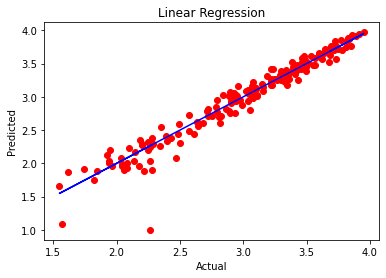

In [273]:
plt.scatter(x = y_test_pred, y = y_test , color= 'r')
plt.plot(y_test_pred,y_test_pred,color = 'b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")
plt.show()

# Model - 2  RandomForestRegressor

# Predict final CGPA based on GPs of first year only

In [274]:
features = df[list(first_year)].values
target = df["CGPA"].values

In [275]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.30)

In [277]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)
# model evaluation for training set
print("The model performance for training set")
print('RMSE is:',mean_squared_error(y_train, y_train_pred))
print('MAE is:', mean_absolute_error(y_train, y_train_pred))
print("---------------------------------------")
# model evaluation for testing set 
print("The model performance for testing set")
print('RMSE is:',mean_squared_error(y_test, y_test_pred))
print('MAE is:',mean_absolute_error(y_test, y_test_pred))
print("---------------------------------------") 
print("The score of model for testing set")
print('R2 score:',r2_score(y_test,y_test_pred))

The model performance for training set
RMSE is: 0.009868240009300542
MAE is: 0.07311874060150352
---------------------------------------
The model performance for testing set
RMSE is: 0.06383422095578292
MAE is: 0.1998449707602338
---------------------------------------
The score of model for testing set
R2 score: 0.8433078852127096


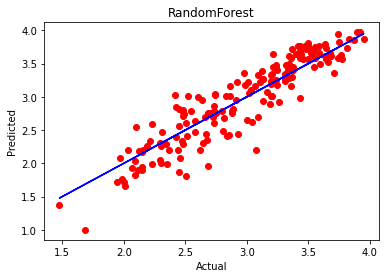

In [279]:
plt.scatter(x = y_test_pred, y = y_test , color= 'r')
plt.plot(y_test_pred,y_test_pred,color = 'b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("RandomForest")
plt.show()

# Predict final CGPA based on GPs of two years 

In [280]:
features = df[list(model2_columns)].values
target = df["CGPA"].values

In [281]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.30)

In [282]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)
# model evaluation for training set
print("The model performance for training set")
print('RMSE is:',mean_squared_error(y_train, y_train_pred))
print('MAE is:', mean_absolute_error(y_train, y_train_pred))
print("---------------------------------------")
# model evaluation for testing set 
print("The model performance for testing set")
print('RMSE is:',mean_squared_error(y_test, y_test_pred))
print('MAE is:',mean_absolute_error(y_test, y_test_pred))
print("---------------------------------------") 
print("The score of model for testing set")
print('R2 score:',r2_score(y_test,y_test_pred))

The model performance for training set
RMSE is: 0.006125691311027567
MAE is: 0.05336538847117779
---------------------------------------
The model performance for testing set
RMSE is: 0.028148889785380105
MAE is: 0.1254983040935672
---------------------------------------
The score of model for testing set
R2 score: 0.9151383222487188


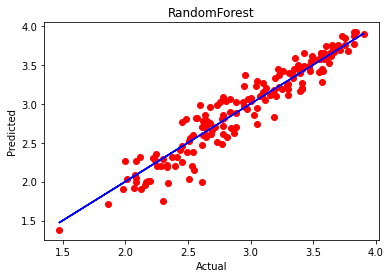

In [283]:
plt.scatter(x = y_test_pred, y = y_test , color= 'r')
plt.plot(y_test_pred,y_test_pred,color = 'b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("RandomForest")
plt.show()

# Predict final CGPA based on GPs of three years 

In [284]:
features = df[list(model3_columns)].values
target = df["CGPA"].values

In [285]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.30)

In [286]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)
# model evaluation for training set
print("The model performance for training set")
print('RMSE is:',mean_squared_error(y_train, y_train_pred))
print('MAE is:', mean_absolute_error(y_train, y_train_pred))
print("---------------------------------------")
# model evaluation for testing set 
print("The model performance for testing set")
print('RMSE is:',mean_squared_error(y_test, y_test_pred))
print('MAE is:',mean_absolute_error(y_test, y_test_pred))
print("---------------------------------------") 
print("The score of model for testing set")
print('R2 score:',r2_score(y_test,y_test_pred))

The model performance for training set
RMSE is: 0.0035589015197994935
MAE is: 0.04115132832080196
---------------------------------------
The model performance for testing set
RMSE is: 0.04456030481871345
MAE is: 0.11673988304093562
---------------------------------------
The score of model for testing set
R2 score: 0.8844785054924709


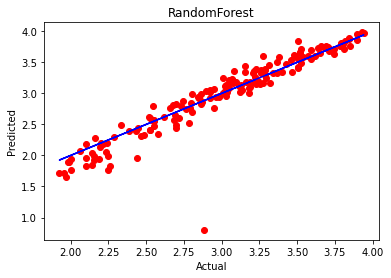

In [287]:
plt.scatter(x = y_test_pred, y = y_test , color= 'r')
plt.plot(y_test_pred,y_test_pred,color = 'b')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("RandomForest")
plt.show()